In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


# zero prediction

In [3]:
sub=pd.read_csv('../submission/sub2_clustifier_week_mad.csv.gz',index_col=0)

In [4]:
zero_pred=sub['Visits']<0.5

In [5]:
zero_pred.mean()

0.017764695339266386

In [6]:
zero_pred.head()

Id
0b293039387a    False
7114389dd824    False
057b02ff1f09    False
bd2aca21caa3    False
c0effb42cdd5    False
Name: Visits, dtype: bool

# Weighted by loglp size

In [7]:
w=[[array([-4.39559937], dtype=float32), array([-4.91468716], dtype=float32)], [array([ 1.70440793], dtype=float32), array([ 0.00341442], dtype=float32)], [array([ 2.09683466], dtype=float32), array([ 0.01907348], dtype=float32)], [array([-0.94681334], dtype=float32), array([ 0.04782599], dtype=float32)], [array([ 2.29897046], dtype=float32), array([ 0.0009233], dtype=float32)], [array([-1.55307293], dtype=float32), array([-0.29954535], dtype=float32)]]

In [8]:
w

[[array([-4.39559937], dtype=float32), array([-4.91468716], dtype=float32)],
 [array([ 1.70440793], dtype=float32), array([ 0.00341442], dtype=float32)],
 [array([ 2.09683466], dtype=float32), array([ 0.01907348], dtype=float32)],
 [array([-0.94681334], dtype=float32), array([ 0.04782599], dtype=float32)],
 [array([ 2.29897046], dtype=float32), array([ 0.0009233], dtype=float32)],
 [array([-1.55307293], dtype=float32), array([-0.29954535], dtype=float32)]]

In [9]:
def f(m):
    #m=np.log(m+1)
    x=[]
    for (a,b) in w:
        a=a[0]
        b=b[0]
        x.append(a*m+b)
    x.append(m*0+1)
    x=np.array(x).T
    x=np.exp(x)
    return x/np.sum(x,1,keepdims=True)

In [10]:
ww=f(np.array([np.log(m+1) for m in range(1,100)]))
ww.shape  

(99, 7)

In [11]:
pred_files=["sub_pred_lstm1_60_medadj30_nozero_noxpad.csv.gz",'sub_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz'
            ,'sub_pred_lstm1_60_medadj_nozero_noxpad.csv.gz','sub_pred_lstm1_60_512_nozero_xnopad.csv.gz',
           'sub_pred_lstm1_log_60_nozero_noxpad.csv.gz',
           'sub_pred_xgb_log_mix12.csv.gz','sub_clustifier_weekend_mad.csv.gz']
lengends=[u.replace("_nozero_noxpad.csv.gz","").replace("_nozero_xnopad.csv.gz","")\
          .replace('sub_pred_',"").replace('_mad.csv.gz',"") for u in pred_files]

In [12]:
assert len(pred_files)==len(w)+1

In [13]:
f(np.array([1]))

array([[  3.34284345e-06,   2.03807388e-01,   3.06513304e-01,
          1.50347722e-02,   3.68428544e-01,   5.79348925e-03,
          1.00419160e-01]])

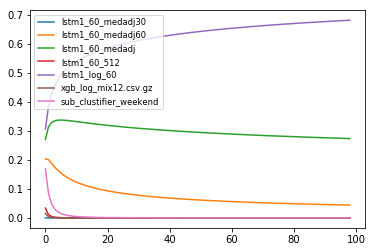

In [14]:
for i in range(ww.shape[1]):
    plt.plot(ww[:,i])
from matplotlib.font_manager import FontProperties
fontP = FontProperties()
fontP.set_size('small')
plt.legend(lengends, prop = fontP)

In [15]:
trainsize=pd.read_csv('../input/train_3_withlogsize.csv.gz',index_col=0)
trainsize.head()

logsize
Id                   
4ba4d551a031      3.2
60d27ad56a15      3.0
fd318ba35812      1.7
6f94c9eff16b      2.8
3d831f757952      3.0

In [16]:
trainsize.shape

(8993906, 1)

In [17]:
pred_files=np.array([u.replace('sub_','sub2_') for u in pred_files])

In [18]:
import os.path
for u in pred_files:
    assert os.path.isfile('../submission/'+u), u


In [19]:
pred_files

array(['sub2_pred_lstm1_60_medadj30_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_medadj_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_512_nozero_xnopad.csv.gz',
       'sub2_pred_lstm1_log_60_nozero_noxpad.csv.gz',
       'sub2_pred_xgb_log_mix12.csv.gz',
       'sub2_clustifier_weekend_mad.csv.gz'], 
      dtype='|S48')

In [20]:
%time df=pd.concat([pd.read_csv('../submission/'+u,index_col=0) for u in pred_files],axis=1)

CPU times: user 3min 36s, sys: 5.49 s, total: 3min 41s
Wall time: 3min 41s


In [21]:
df.shape,trainsize.shape

((8993906, 7), (8993906, 1))

In [22]:
df.head()

Visits  Visits  Visits  Visits  Visits  Visits  Visits
0000009abb1c    13.7   117.7   117.1    87.3   101.4   111.5   119.5
0000023b7434     9.5     9.0     9.4     9.7     9.2     9.2     9.0
000002ddbe6e    92.8    86.2    90.8    89.0    84.1    87.3    88.5
0000032f82ac   878.7   785.2   840.5   841.8   782.4   806.7   752.5
000003e266a3    39.4    42.5    42.2    39.0    42.9    42.5    42.0

In [36]:
np.log(df.head().mean(1))

0000009abb1c    4.558677
0000023b7434    2.228477
000002ddbe6e    4.481710
0000032f82ac    6.700169
000003e266a3    3.725693
dtype: float64

In [23]:
trainsize=trainsize.loc[df.index]

In [37]:
trainsize.head()

logsize
0000009abb1c      4.7
0000023b7434      2.2
000002ddbe6e      4.4
0000032f82ac      6.6
000003e266a3      3.7

In [25]:
df.shape,trainsize.shape

((8993906, 7), (8993906, 1))

In [26]:
df.isnull().sum()

Visits    0
Visits    0
Visits    0
Visits    0
Visits    0
Visits    0
Visits    0
dtype: int64

In [27]:
trainsize.isnull().sum()

logsize    0
dtype: int64

In [28]:
weights=f(trainsize['logsize'].values)

In [29]:
weights.shape

(8993906, 7)

In [30]:
weights[:3].sum(1)

array([ 1.,  1.,  1.])

In [31]:
weighted_pred=df*weights

In [32]:
weighted_pred.head()

Visits     Visits      Visits        Visits      Visits  \
0000009abb1c  1.493263e-15   4.958316   31.690598  1.490147e-05   69.682761   
0000023b7434  1.439894e-08   1.256009    3.159527  4.146733e-03    4.737288   
000002ddbe6e  7.351683e-14   4.233780   25.467953  3.923659e-05   56.374422   
0000032f82ac  3.237091e-19  12.075793  175.026407  3.405030e-07  607.439228   
000003e266a3  3.168392e-12   2.962608   12.763939  1.561053e-04   26.918878   

                    Visits    Visits  
0000009abb1c  7.782888e-07  0.004526  
0000023b7434  7.321689e-04  0.080045  
000002ddbe6e  1.887797e-06  0.006517  
0000032f82ac  4.217104e-09  0.000408  
000003e266a3  1.275523e-05  0.014473

In [33]:
submission=pd.DataFrame(weighted_pred.sum(1),columns=['Visits'])

In [34]:
df.head()

Visits  Visits  Visits  Visits  Visits  Visits  Visits
0000009abb1c    13.7   117.7   117.1    87.3   101.4   111.5   119.5
0000023b7434     9.5     9.0     9.4     9.7     9.2     9.2     9.0
000002ddbe6e    92.8    86.2    90.8    89.0    84.1    87.3    88.5
0000032f82ac   878.7   785.2   840.5   841.8   782.4   806.7   752.5
000003e266a3    39.4    42.5    42.2    39.0    42.9    42.5    42.0

In [39]:
submission.index.name='Id'

In [40]:
submission.head()

Visits
Id                      
0000009abb1c  106.336216
0000023b7434    9.237748
000002ddbe6e   86.082713
0000032f82ac  794.541837
000003e266a3   42.660067

In [41]:
submission.isnull().sum()

Visits    0
dtype: int64

In [42]:
submission.to_csv("../submission/sub2_size_weighted_average.csv.gz",
                                   float_format='%.1f', compression="gzip")

In [43]:
#submission=pd.read_csv("../submission/sub2_size_weighted_average.csv.gz",index_col=0)

In [44]:
submission['nonzero']=1-zero_pred

In [45]:
submission.isnull().sum()

Visits     0
nonzero    0
dtype: int64

In [46]:
submission['Visits']=submission['Visits']*submission['nonzero']

In [47]:
(submission==0).mean()

Visits     0.017765
nonzero    0.017765
dtype: float64

In [48]:
submission.head()

Visits  nonzero
Id                               
0000009abb1c  106.336216        1
0000023b7434    9.237748        1
000002ddbe6e   86.082713        1
0000032f82ac  794.541837        1
000003e266a3   42.660067        1

In [49]:
submission[['Visits']].to_csv("../submission/sub2_size_weighted_average_withzero.csv.gz",
                                   float_format='%.1f', compression="gzip")

In [50]:
import pandas as pd
pd.read_csv("../submission/sub2_size_weighted_average_withzero.csv.gz").head()

Id  Visits
0  0000009abb1c   106.3
1  0000023b7434     9.2
2  000002ddbe6e    86.1
3  0000032f82ac   794.5
4  000003e266a3    42.7

# simple weighted average

In [159]:
pred_files=["sub_pred_lstm1_60_medadj30_nozero_noxpad.csv.gz",'sub_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz'
            ,'sub_pred_lstm1_60_medadj_nozero_noxpad.csv.gz','sub_pred_lstm1_60_512_nozero_xnopad.csv.gz',
           'sub_pred_lstm1_log_60_nozero_noxpad.csv.gz',
           'sub_pred_xgb_mix2.csv.gz','sub_pred_xgb_log_mix1.csv.gz']
pred_files=np.array([u.replace('sub_','sub2_') for u in pred_files])

In [160]:
W=[
    [[  1.75386674e-07,   2.14033589e-01,   3.81990105e-01  , 7.21735926e-03,
    3.48200649e-01,   1.69755776e-06 ,  4.85564545e-02]],
    [[  1.62020939e-07,   2.15312317e-01,   3.79738450e-01,   7.07565667e-03,
    3.49150002e-01 ,  1.48910135e-06 ,  4.87218909e-02]],
    [[  1.48614447e-07,   2.11285889e-01 ,  3.91181201e-01,   6.87624235e-03,
    3.42182904e-01 ,  1.28364422e-06,   4.84723337e-02]],
]
W=(np.array([u[0] for u in W],dtype=np.float32))

In [161]:
pd.DataFrame(np.round(W,3))

0      1      2      3      4    5      6
0  0.0  0.214  0.382  0.007  0.348  0.0  0.049
1  0.0  0.215  0.380  0.007  0.349  0.0  0.049
2  0.0  0.211  0.391  0.007  0.342  0.0  0.048

In [162]:
W=W.mean(axis=0)

In [163]:
np.round(W,3)

array([ 0.   ,  0.214,  0.384,  0.007,  0.347,  0.   ,  0.049], dtype=float32)

In [164]:
idx=(W>0.05)

In [165]:
W=W[idx]
W=W/np.sum(W)
pred_files=pred_files[idx]


In [166]:
W

array([ 0.22612596,  0.40694642,  0.36692762], dtype=float32)

In [167]:
pred_files

array(['sub2_pred_lstm1_60_medadj60_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_60_medadj_nozero_noxpad.csv.gz',
       'sub2_pred_lstm1_log_60_nozero_noxpad.csv.gz'], 
      dtype='|S48')

In [168]:
import os.path
for u in pred_files:
    assert os.path.isfile('../submission/'+u), u


In [169]:
%time df=pd.concat([pd.read_csv('../submission/'+u,index_col=0) for u in pred_files],axis=1)

CPU times: user 45.2 s, sys: 1.74 s, total: 46.9 s
Wall time: 46.9 s


In [178]:
df.head()

Visits  Visits  Visits
Id                                  
4ba4d551a031    25.2    26.0    24.9
60d27ad56a15    25.5    25.4    25.2
fd318ba35812     9.3     7.6     7.6
6f94c9eff16b    17.4    17.3    15.6
3d831f757952    19.0    19.9    19.1

In [175]:
weighted_df=pd.DataFrame(df.values*W,index=df.index,columns=df.columns)

In [177]:
weighted_df.head()

Visits     Visits    Visits
Id                                         
4ba4d551a031  5.698374  10.580607  9.136498
60d27ad56a15  5.766212  10.336439  9.246576
fd318ba35812  2.102971   3.092793  2.788650
6f94c9eff16b  3.934592   7.040173  5.724071
3d831f757952  4.296393   8.098234  7.008318

In [187]:
submission=pd.DataFrame(weighted_df.sum(1),columns=['Visits'])

In [190]:
submission.isnull().sum()

Visits    0
dtype: int64

In [188]:
submission.head()

Visits
Id                     
4ba4d551a031  25.415479
60d27ad56a15  25.349227
fd318ba35812   7.984414
6f94c9eff16b  16.698836
3d831f757952  19.402945

In [189]:
submission.to_csv("../submission/sub2_simple_weighted_average.csv.gz",
                                   float_format='%.1f', compression="gzip")

In [200]:
#submission=pd.read_csv("../submission/sub2_simple_weighted_average.csv.gz",index_col=0)

In [201]:
submission['nonzero']=1-zero_pred

In [202]:
submission.isnull().sum()

Visits     0
nonzero    0
dtype: int64

In [203]:
submission['Visits']=submission['Visits']*submission['nonzero']

In [205]:
(submission==0).mean()

Visits     0.017765
nonzero    0.017765
dtype: float64

In [206]:
submission[['Visits']].to_csv("../submission/sub2_simple_weighted_average_withzero.csv.gz",
                                   float_format='%.1f', compression="gzip")

In [71]:
a=pd.read_csv('../submission/sub_pred_xgb_log_mix1.csv.gz',index_col=0)

In [72]:
b=pd.read_csv('../submission/sub_pred_xgb_log_mix2.csv.gz',index_col=0)

In [73]:
c=(a+b)/2

In [74]:
c.head()

Visits
Id                  
ff8c1aade3de   18.05
3da6fd5b23c1   19.65
cd9e83803be4    4.70
65cd4af0968c   15.40
75bae1fb2637   10.60

In [75]:
c.to_csv('../submission/sub_pred_xgb_log_mix12.csv.gz',compression='gzip')